___

<a href='https://sites.google.com/fat.uerj.br/livia'> <img src='../../figures/capa2.png' /></a>
___

#Regressão Logística com Python

A Regressão Logística nada mais é que a Regressão Linear, mas com a utilização de dados binários (0 e 1) e de uma regressão de uma função sigmóide, que é sempre próxima de 0 ou 1. Então aqui calculamos a probabilidade prevista de um output para um determinado x seja 1.

Para essa discussão iremos trabalhar com [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). É um data set muito famoso e usado com frequência por estudantes como um primeiro passo para o machine learning!

Vamos tentar prever uma classificação-sobrevivência ou morte.Bora começar nosso entendimento da aplicação de regressão logística em Python para classificação.

Nós vamos usar uma versão "quase limpa" do data set do titanic. Se você usar o data set hospedado diretamente pelo Kaggle, você provavelmente precisará realizar uma limpeza adicional, não mostrada aqui.

## Importe Bibliotecas
Vamos importar algumas bibliotecas para começar!

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Os Dados

Vamos iniciar lendo o arquivo titanic_train.csv em um dataframe.

In [111]:
train = pd.read_csv('titanic_train.csv')

In [112]:
train.head()

,Idpassageiro,Sobreviveu,Classe Passageiro,Nome,Sexo,Idade,SibSp,Correcao,Ticket,Tarifa,Cabine,Embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
train.describe()

,Idpassageiro,Sobreviveu,Classe Passageiro,Idade,SibSp,Correcao,Tarifa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Variáveis:
- Sobreviveu: 0 = Não, 1 = Sim
- Classe Passageiro: 1 = 1° (maior), 2 = 2° (média) e 3 = 3°(menor).
- Sexo: Sexo do passageiro
- Idade: Idade em anos do passageiro.
- Sibsp: Número de irmãos/cônjugues a bordo.
- Correcao: Número de pais/filhos a bordo.
- Ticket: Número do ticket
- Tarifa: Tarifa do passageiro.
- Cabine: Número da cabine
- Embarcou: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

# Análise Exploratória dos Dados

Iremos iniciar uma análise exploratória de dados! Vamos começar checando nossos dados em falta!

## Dados em Falta

Podemos usar o seaborn para criar um mapa de calor simples para visualizar os dados em falta/vazios!

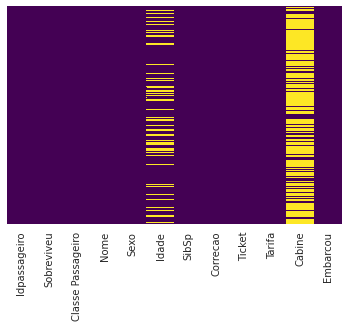

In [114]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [115]:
Null_values = train.isnull().sum().sort_values(ascending=False)
Null_values

Cabine               687
Idade                177
Embarcou               2
Idpassageiro           0
Sobreviveu             0
Classe Passageiro      0
Nome                   0
Sexo                   0
SibSp                  0
Correcao               0
Ticket                 0
Tarifa                 0
dtype: int64

Faltam 20% dos dados de idade, uma proporção pequena o bastante para realizar uma substituição por imputaçã, que será explicada em breve. A coluna de cabine tem tanta falta que é impossível fazer algo útil a nível básico. Provavelmente a deixaremos de lado ou mudaremos ela para "Cabine Conhecida: 1 ou 0."

Continuando, vamos visualizar mais os dados! Assista o vídeo para mais explicações sobre esses plots, esse código é apenas uma referência.

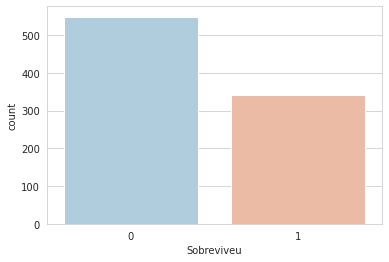

In [116]:
sns.set_style('whitegrid')
sns.countplot(x='Sobreviveu',data=train,palette='RdBu_r')

**Quantidade menor de sobreviventes**

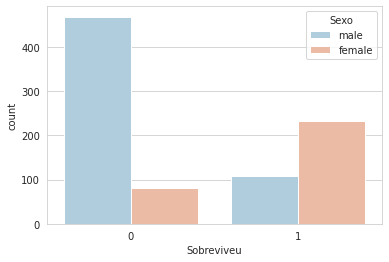

In [117]:
sns.set_style('whitegrid')
sns.countplot(x='Sobreviveu',hue='Sexo',data=train,palette='RdBu_r')

**Homens sobreviveram menos que mulheres**

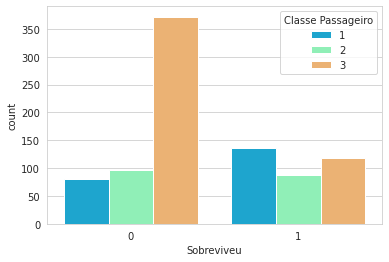

In [118]:
sns.set_style('whitegrid')
sns.countplot(x='Sobreviveu',hue='Classe Passageiro',data=train,palette='rainbow')

**Passageiros Classe 3 foram os que mais morreram.**

**Os de Classe 1 foram os que mais sobreviveram**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



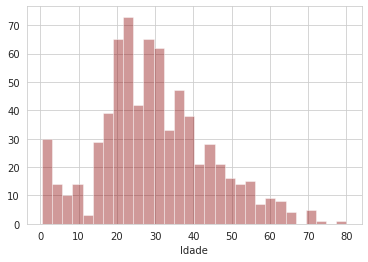

In [119]:
sns.distplot(train['Idade'].dropna(),kde=False,color='darkred',bins=30)

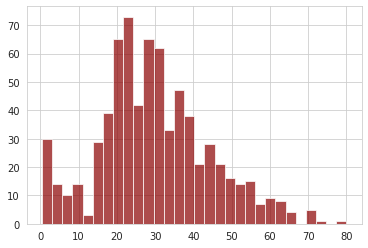

In [120]:
train['Idade'].hist(bins=30,color='darkred',alpha=0.7)

**Maioria dos passageiros entre 20 e 30 anos, aproximadamente**

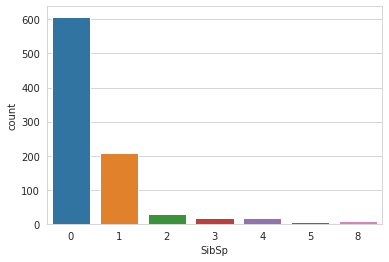

In [121]:
sns.countplot(x='SibSp',data=train)

**Quase todos os passageiros não possuem irmãos/cônjugues como passageiros**.

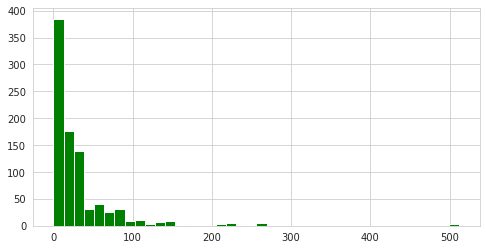

In [122]:
train['Tarifa'].hist(color='green',bins=40,figsize=(8,4))

**Muitas tarifas de valor relativamente baixo e poucas com valores maiores**

____
### Cufflinks para plots
___
 Vamos tirar um tempo para mostrar um exemplo de cufflinks!

In [123]:
import cufflinks as cf
cf.go_offline()

In [124]:
train['Tarifa'].iplot(kind='hist',bins=30,color='green')

___
## Limpeza de Dados
Queremos preencher os espaços sem dados de idade, ao invés de só descartar essas linhas por completo. Uma forma é preencher com a idade média dos passageiros (imputação). De forma mais inteligente podemos preencher de acordo com a idade média dos passageiros de acordo com a classe deles. Por exemplo:

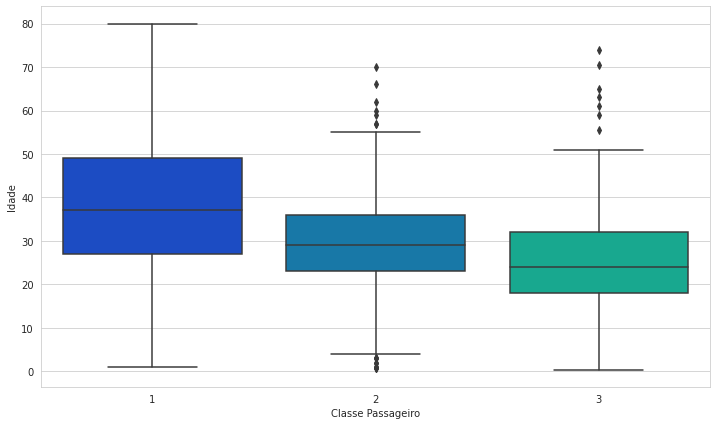

In [125]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Classe Passageiro',y='Idade',data=train,palette='winter')

Podemos ver que os passageiros com as maiores classes são mais velhos. A partir disso usaremos dos valores das idades médias para imputar os dados de idade faltantes, de acordo com a classe.

In [126]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

**Agora aplique essa função!**

In [127]:
train['Idade'] = train[['Idade','Classe Passageiro']].apply(impute_age,axis=1)

**Agora vamos checar o mapa de calor novamente!**

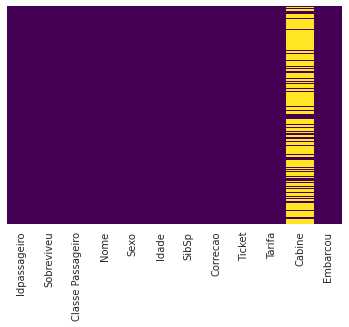

In [128]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Excelente! Vamos adiante e remover a coluna Embarcou e suas linhas que não haviam dados.**

In [129]:
train.drop('Cabine',axis=1,inplace=True)

In [130]:
train.head()

,Idpassageiro,Sobreviveu,Classe Passageiro,Nome,Sexo,Idade,SibSp,Correcao,Ticket,Tarifa,Embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [131]:
train.dropna(inplace=True)

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idpassageiro       889 non-null    int64  
 1   Sobreviveu         889 non-null    int64  
 2   Classe Passageiro  889 non-null    int64  
 3   Nome               889 non-null    object 
 4   Sexo               889 non-null    object 
 5   Idade              889 non-null    float64
 6   SibSp              889 non-null    int64  
 7   Correcao           889 non-null    int64  
 8   Ticket             889 non-null    object 
 9   Tarifa             889 non-null    float64
 10  Embarcou           889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Convertendo Caraterísticas Categóricas

**Vamos precisar converter as variáveis qualitativas em  variáveis fictícias usando get_dumies do pandas! Caso contrário nosso algoritmo de machine learning não será capaz de pegar essas características como inputs e ser avaliado.**

In [133]:
sexo = pd.get_dummies(train['Sexo'],drop_first=True)
embarcou = pd.get_dummies(train['Embarcou'],drop_first=True)

In [134]:
train.drop(['Sexo','Embarcou','Nome','Ticket'],axis=1,inplace=True)

In [135]:
train = pd.concat([train,sexo,embarcou],axis=1)

In [136]:
train.head()

,Idpassageiro,Sobreviveu,Classe Passageiro,Idade,SibSp,Correcao,Tarifa,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


**Observe que retiramos a coluna Sexo, Nome, Embarcou e Ticket**

**Por outro lado entrou as colunas male, Q e S, que darão respostas binárias agora**

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idpassageiro       889 non-null    int64  
 1   Sobreviveu         889 non-null    int64  
 2   Classe Passageiro  889 non-null    int64  
 3   Idade              889 non-null    float64
 4   SibSp              889 non-null    int64  
 5   Correcao           889 non-null    int64  
 6   Tarifa             889 non-null    float64
 7   male               889 non-null    uint8  
 8   Q                  889 non-null    uint8  
 9   S                  889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


Boa! Nossos dados estão prontos para o nosso modelo!

#Construindo um modelo de Regressão Logística 

Iremos começar dividindo nossos dados em um conjuntos, um de treinamento e outro de teste (há um arquivo test.csv que você pode usar, caso queira praticar)

## Divisão Treinamento e Teste

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Sobreviveu',axis=1), 
                                                    train['Sobreviveu'], test_size=0.30, 
                                                    random_state=101)

**Recebe X e y. Cada uma será dividida em duas, contendo os dados originais: 70%  treino(_train) e 30% teste(_test).**

## Treinando e Prevendo

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [142]:
predictions = logmodel.predict(X_test)

## Validação

Podemos checar precisão,relembrar, pontuação f-1 usando relatório de classificação!

In [143]:
from sklearn.metrics import classification_report

In [144]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



Nada mal! Conseguimos uma acurácia de 80%, ou seja, há duas observações erroneamente classificadas. Uma delas é falsa negativa e a outra uma falsa positiva.

Você deve estar querendo explorar outra engenharia de características e o outro arquivo titanic_text.csv. Algumas sujestões de engenharia de características:

- Tente pegar o título da pessoa (Dr., Mr., Mrs.,etc...) dos nomes como um atributo

- Talvez a letra da Cabine possa ser um atributo

- Há informações úteis no ticket?

##Bom Trabalho!